In [4]:
from PIL import Image
import os, glob, sys, numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

img_dir = 'image_copy'
categories = ['cabbage_images', 'onion_images', 'trans_images']
np_classes = len(categories)

image_w = 64
image_h = 64


pixel = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    img_dir_detail = img_dir + "/" + cat
    files = glob.glob(img_dir_detail+"/*.jpg")


    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
            #Y는 0 아니면 1이니까 idx값으로 넣는다.
            X.append(data)
            y.append(idx)
            if i % 300 == 0:
                print(cat, " : ", f)
        except:
            print(cat, str(i)+" 번째에서 에러 ")
X = np.array(X)
Y = np.array(y)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

xy = (X_train, X_test, Y_train, Y_test)
np.save("image_copy/binary_image_data.npy", xy)

cabbage_images  :  image_copy/cabbage_images\cabbage_1.jpg
cabbage_images  :  image_copy/cabbage_images\cabbage_1269.jpg
cabbage_images  :  image_copy/cabbage_images\cabbage_1539.jpg
cabbage_images  :  image_copy/cabbage_images\cabbage_1809.jpg
cabbage_images  :  image_copy/cabbage_images\cabbage_279.jpg
cabbage_images  :  image_copy/cabbage_images\cabbage_549.jpg
cabbage_images  :  image_copy/cabbage_images\cabbage_819.jpg
onion_images  :  image_copy/onion_images\onion_1.jpg
onion_images  :  image_copy/onion_images\onion_1269.jpg
onion_images  :  image_copy/onion_images\onion_1539.jpg
onion_images  :  image_copy/onion_images\onion_1809.jpg
onion_images  :  image_copy/onion_images\onion_279.jpg
onion_images  :  image_copy/onion_images\onion_549.jpg
onion_images  :  image_copy/onion_images\onion_819.jpg
trans_images  :  image_copy/trans_images\carrot_1.jpg
trans_images  :  image_copy/trans_images\carrot_1269.jpg
trans_images  :  image_copy/trans_images\carrot_1539.jpg
trans_images  :  i

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


#X_train, X_test, y_train, y_test = np.load('image_copy/binary_image_data.npy')
print(X_train.shape)
print(X_train.shape[0])
print(np.bincount(Y_train))
print(np.bincount(Y_test))

(5400, 64, 64, 3)
5400
[1805 1797 1798]
[195 203 202]


In [48]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [49]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [50]:
model = VGG16(weights='imagenet', include_top=False)

In [51]:
img_path = 'image_copy/cabbage/cabbage_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [53]:
model = Sequential()

In [54]:

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [55]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [56]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [58]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [59]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata,
                           validation_data= testdata, validation_steps=10,epochs=3,callbacks=[checkpoint,early])

Epoch 1/3
10/10 [==============================] - 227s 23s/step - loss: 50095445770240.0000 - accuracy: 0.5000 - val_loss: 1637105436459008.0000 - val_accuracy: 0.0000e+00
Epoch 2/3
10/10 [==============================] - 244s 24s/step - loss: nan - accuracy: 0.6000
Epoch 3/3
10/10 [==============================] - 185s 19s/step - loss: nan - accuracy: 1.0000


{'loss': [50095445770240.0, nan, nan], 'accuracy': [0.5, 0.6000000238418579, 1.0], 'val_loss': [1637105436459008.0], 'val_accuracy': [0.0]}


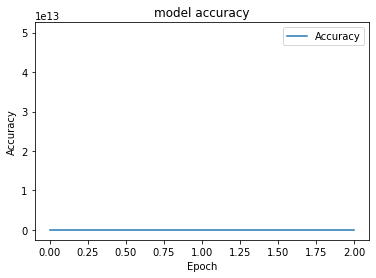

In [78]:
import matplotlib.pyplot as plt
print(hist.history)
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy"])
plt.show()

OSError: SavedModel file does not exist at: vgg16_1.h5/{saved_model.pbtxt|saved_model.pb}

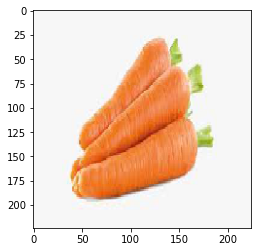

In [66]:
from keras.preprocessing import image
img = image.load_img("image_copy/carrot/carrot_1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("carrot")
else:
    print('cabbage')